# Cross-Comparison between Unified Model and Alternatives

James Yu, 26 July 2022 edited 27 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We look at two different classes of networks:

In [2]:
A_1 = np.array([
    [0.9, 0.07, 0.03],
    [0.07, 0.58, 0.35],
    [0.03, 0.35, 0.62]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([1.        , 0.85199338, 0.24800662])

The second-largest eigenvalue is 0.852.

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

The second-largest eigenvalue is 0.406.

In [5]:
delta = 0.9
c = 200.0
T = 60
x_0 = np.array([[10.0, -5.0, 5.0]], ndmin = 2).T
x_0

array([[10.],
       [-5.],
       [ 5.]])

# Convergence and Payoffs

In [6]:
def finite_solution(A, delta, c, T, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    for i in range(T): # generate solution matrices
        K_t = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t)

    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [x_0]
    for i, K in enumerate(K_sequence[1:]): # L_0(K_1), L_1(K_2), etc
        L_t = -delta * (np.linalg.inv((delta * K) + (c * I)) @ K @ D)
        tilde_r_t = L_t @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = U @ tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts

In [7]:
def payoffs(xs, rs, delta, c, T, finite = True):
    stage_payoffs = []
    discounted_stage_payoffs = []
    cumulative_payoffs = []
    payoff = 0.0
    for i in range(T):
        stage_payoff = (xs[i].T @ xs[i]).item() + (c * (rs[i].T @ rs[i])).item()
        payoff += -delta**i * stage_payoff
        stage_payoffs.append(-stage_payoff)
        discounted_stage_payoffs.append(-delta**i * stage_payoff)
        cumulative_payoffs.append(payoff)

    if finite:
        stage_payoff_T = (xs[-1].T @ xs[-1]).item()
        payoff += -delta**T * stage_payoff_T
        stage_payoffs.append(-stage_payoff_T)
        discounted_stage_payoffs.append(-delta**i * stage_payoff_T)
        cumulative_payoffs.append(payoff)
        
    return payoff, stage_payoffs, discounted_stage_payoffs, cumulative_payoffs

x_sequence_1, r_sequence_1 = finite_solution(A_1, delta, c, T, x_0)
x_sequence_2, r_sequence_2 = finite_solution(A_2, delta, c, T, x_0)
payoff_1, stage_payoffs_1, discounted_stage_payoffs_1, cumulative_payoffs_1 = payoffs(x_sequence_1, r_sequence_1, delta, c, T)
payoff_2, stage_payoffs_2, discounted_stage_payoffs_2, cumulative_payoffs_2 = payoffs(x_sequence_2, r_sequence_2, delta, c, T)

## Finite-horizon:

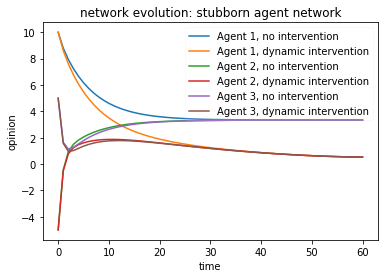

In [8]:
xs_1 = [np.linalg.matrix_power(A_1, t) @ x_0 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

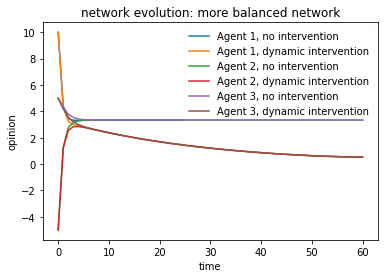

In [9]:
xs_2 = [np.linalg.matrix_power(A_2, t) @ x_0 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

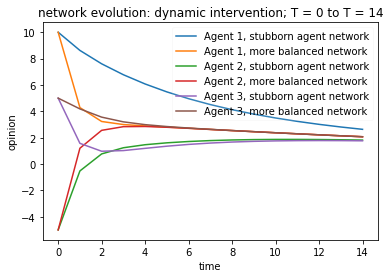

In [10]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

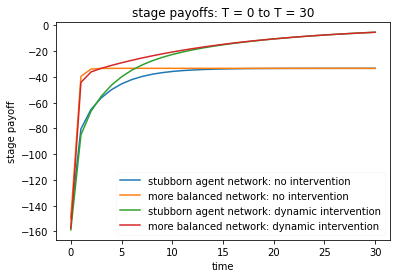

In [11]:
TRUNCATE_TO = 31
plt.plot(range(TRUNCATE_TO), [-(xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-(xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

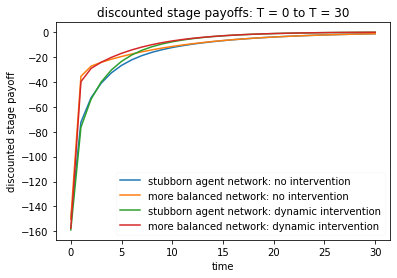

In [12]:
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

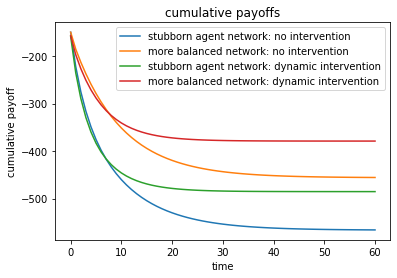

In [13]:
cumulative_payoff_1 = 0.0
cumulative_payoff_2 = 0.0
p_1 = []
p_2 = []
for i in range(T+1):
    cumulative_payoff_1 += -(delta**i) * (xs_1[i].T @ xs_1[i]).item()
    cumulative_payoff_2 += -(delta**i) * (xs_2[i].T @ xs_2[i]).item()
    p_1.append(cumulative_payoff_1)
    p_2.append(cumulative_payoff_2)
    
plt.plot(range(T+1), p_1, label = "stubborn agent network: no intervention")
plt.plot(range(T+1), p_2, label = "more balanced network: no intervention")
plt.plot(range(T+1), cumulative_payoffs_1, label = "stubborn agent network: dynamic intervention")
plt.plot(range(T+1), cumulative_payoffs_2, label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()

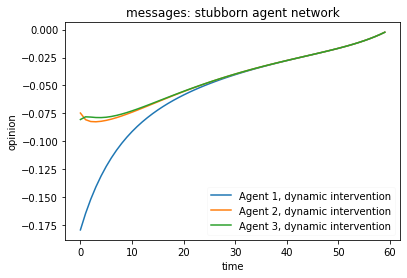

In [14]:
for i in range(3):
    plt.plot(range(T), [r_sequence_1[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

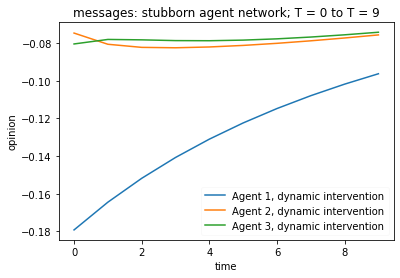

In [15]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

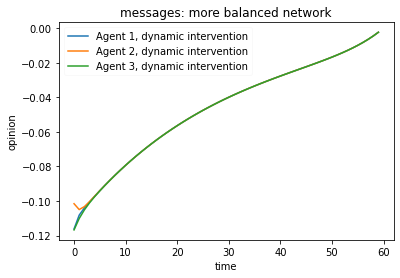

In [16]:
for i in range(3):
    plt.plot(range(T), [r_sequence_2[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

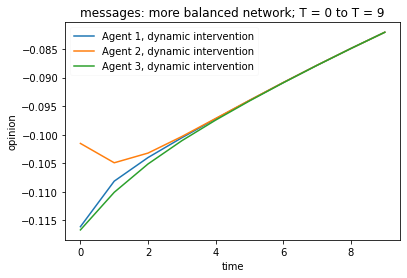

In [17]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

## Infinite-horizon

Comparisons are made to the same no-intervention data as in the finite-horizon case

In [18]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = U @ tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [19]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)
payoff_1i, stage_payoffs_1i, discounted_stage_payoffs_1i, cumulative_payoffs_1i = payoffs(x_sequence_1i, 
                                                                                      r_sequence_1i, 
                                                                                      delta, 
                                                                                      c, 
                                                                                      len(r_sequence_1i), 
                                                                                      finite = False)
payoff_2i, stage_payoffs_2i, discounted_stage_payoffs_2i, cumulative_payoffs_2i = payoffs(x_sequence_2i, 
                                                                                      r_sequence_2i, 
                                                                                      delta, 
                                                                                      c, 
                                                                                      len(r_sequence_2i), 
                                                                                      finite = False)

In [60]:
[x.T for x in x_sequence_1i[:100]] # the first 100 stubborn network opinions

[array([[10., -5.,  5.]]),
 array([[ 8.6207811 , -0.52467276,  1.56954572]]),
 array([[7.60456983, 0.76786613, 0.97005087]]),
 array([[6.77514312, 1.23493459, 1.02004687]]),
 array([[6.073919  , 1.46505257, 1.18923445]]),
 array([[5.47373531, 1.60907758, 1.35356911]]),
 array([[4.95718997, 1.70894015, 1.48818486]]),
 array([[4.51097695, 1.77892891, 1.59177291]]),
 array([[4.12422084, 1.82587448, 1.66806272]]),
 array([[3.78784094, 1.85423256, 1.72137452]]),
 array([[3.49420496, 1.86742372, 1.75562544]]),
 array([[3.23688441, 1.8682356 , 1.7741716 ]]),
 array([[3.01046016, 1.85898242, 1.77984272]]),
 array([[2.81036177, 1.84159495, 1.77501241]]),
 array([[2.63273302, 1.81768532, 1.76166769]]),
 array([[2.47431883, 1.78859883, 1.74146978]]),
 array([[2.33237026, 1.75545689, 1.71580604]]),
 array([[2.20456454, 1.71919289, 1.68583364]]),
 array([[2.08893775, 1.68058245, 1.65251647]]),
 array([[1.98382824, 1.64026872, 1.61665611]]),
 array([[1.88782897, 1.59878376, 1.57891788]]),
 array([[1

In [62]:
[x.T for x in x_sequence_2i[:100]] # the first 100 stubborn network opinions

[array([[10., -5.,  5.]]),
 array([[4.28387515, 1.19846684, 4.18331207]]),
 array([[3.22798519, 2.55643512, 3.55806653]]),
 array([[2.99513072, 2.83496856, 3.20002529]]),
 array([[2.89161993, 2.84840435, 2.98818175]]),
 array([[2.80267537, 2.78937331, 2.84433332]]),
 array([[2.71384987, 2.70928076, 2.73118435]]),
 array([[2.62542355, 2.6237338 , 2.63252142]]),
 array([[2.53864185, 2.53798962, 2.54152657]]),
 array([[2.45417908, 2.45392156, 2.45534738]]),
 array([[2.37229487, 2.37219202, 2.37276723]]),
 array([[2.29304736, 2.29300606, 2.29323819]]),
 array([[2.21640829, 2.21639165, 2.21648535]]),
 array([[2.14231491, 2.1423082 , 2.14234602]]),
 array([[2.07069206, 2.07068935, 2.07070462]]),
 array([[2.00146116, 2.00146007, 2.00146623]]),
 array([[1.93454386, 1.93454342, 1.93454591]]),
 array([[1.86986347, 1.8698633 , 1.8698643 ]]),
 array([[1.80734547, 1.8073454 , 1.8073458 ]]),
 array([[1.74691766, 1.74691763, 1.74691779]]),
 array([[1.68851019, 1.68851018, 1.68851025]]),
 array([[1.63

### Speed tests: time to reach $|x_t^j| = 2$:

In [70]:
seen = []
for i in range(len(x_sequence_1i)):
    for j in range(3):
        if abs(x_sequence_1i[i][j]) <= 2 and j not in seen:
            seen.append(j)
            print(f"stubborn network: agent {j+1} reaches 2 after {i} periods")

print()
seen_2 = []
for i in range(len(x_sequence_2i)):
    for j in range(3):
        if abs(x_sequence_2i[i][j]) <= 2 and j not in seen_2:
            seen_2.append(j)
            print(f"balanced network: agent {j+1} reaches 2 after {i} periods")

stubborn network: agent 2 reaches 2 after 1 periods
stubborn network: agent 3 reaches 2 after 1 periods
stubborn network: agent 1 reaches 2 after 19 periods

balanced network: agent 2 reaches 2 after 1 periods
balanced network: agent 1 reaches 2 after 16 periods
balanced network: agent 3 reaches 2 after 16 periods


### Speed tests: time to reach $|x_t^j| = 10^{-1}$:

In [68]:
seen = []
for i in range(len(x_sequence_1i)):
    for j in range(3):
        if abs(x_sequence_1i[i][j]) <= 10**-1 and j not in seen:
            seen.append(j)
            print(f"stubborn network: agent {j+1} reaches 10^-1 after {i} periods")

print()
seen_2 = []
for i in range(len(x_sequence_2i)):
    for j in range(3):
        if abs(x_sequence_2i[i][j]) <= 10**-1 and j not in seen_2:
            seen_2.append(j)
            print(f"balanced network: agent {j+1} reaches 10^-1 after {i} periods")

stubborn network: agent 1 reaches 10^-1 after 104 periods
stubborn network: agent 2 reaches 10^-1 after 104 periods
stubborn network: agent 3 reaches 10^-1 after 104 periods

balanced network: agent 1 reaches 10^-1 after 104 periods
balanced network: agent 2 reaches 10^-1 after 104 periods
balanced network: agent 3 reaches 10^-1 after 104 periods


### Speed tests: time to reach $|x_t^j| = 10^{-5}$:

In [66]:
seen = []
for i in range(len(x_sequence_1i)):
    for j in range(3):
        if abs(x_sequence_1i[i][j]) <= 10**-5 and j not in seen:
            seen.append(j)
            print(f"stubborn network: agent {j+1} reaches 10^-5 after {i} periods")

print()
seen_2 = []
for i in range(len(x_sequence_2i)):
    for j in range(3):
        if abs(x_sequence_2i[i][j]) <= 10**-5 and j not in seen_2:
            seen_2.append(j)
            print(f"balanced network: agent {j+1} reaches 10^-5 after {i} periods")

stubborn network: agent 1 reaches 10^-5 after 374 periods
stubborn network: agent 2 reaches 10^-5 after 374 periods
stubborn network: agent 3 reaches 10^-5 after 374 periods

balanced network: agent 1 reaches 10^-5 after 374 periods
balanced network: agent 2 reaches 10^-5 after 374 periods
balanced network: agent 3 reaches 10^-5 after 374 periods


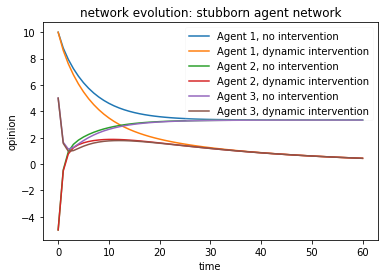

In [20]:
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_1i[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

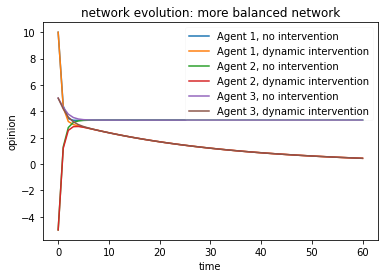

In [21]:
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_2i[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

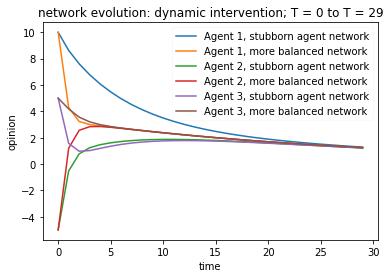

In [69]:
for i in range(3):
    plt.plot(range(30), [x_sequence_1i[j][i].item() for j in range(30)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(30), [x_sequence_2i[j][i].item() for j in range(30)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 29")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

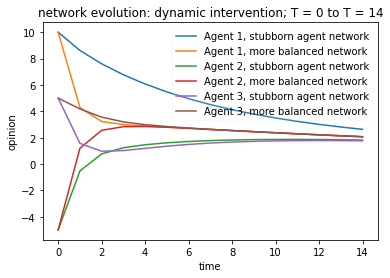

In [22]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1i[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2i[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

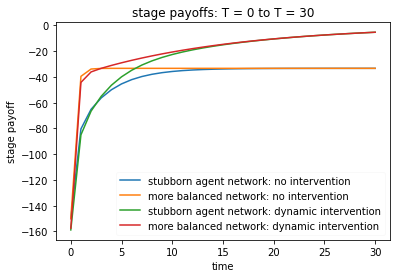

In [23]:
TRUNCATE_TO = 31
plt.plot(range(TRUNCATE_TO), [-(xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-(xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

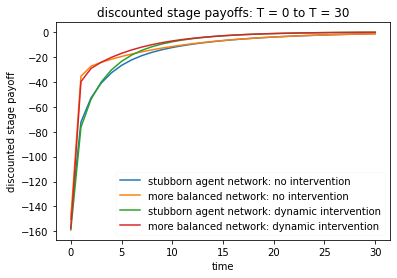

In [24]:
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

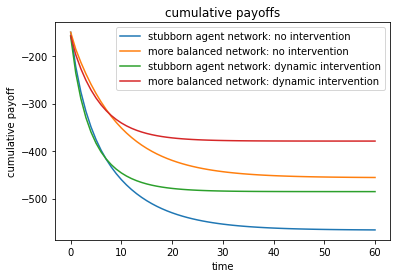

In [25]:
plt.plot(range(T+1), p_1, label = "stubborn agent network: no intervention")
plt.plot(range(T+1), p_2, label = "more balanced network: no intervention")
plt.plot(range(T+1), cumulative_payoffs_1i[:T+1], label = "stubborn agent network: dynamic intervention")
plt.plot(range(T+1), cumulative_payoffs_2i[:T+1], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()

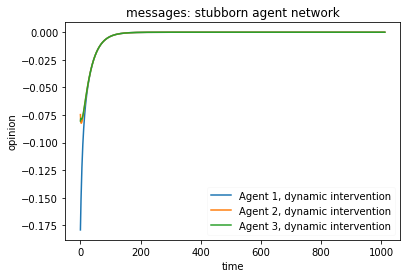

In [26]:
for i in range(3):
    plt.plot(range(len(r_sequence_1i)), [r_sequence_1i[j][i].item() for j in range(len(r_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

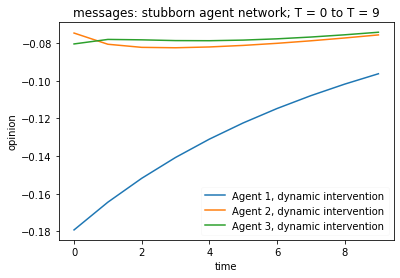

In [27]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

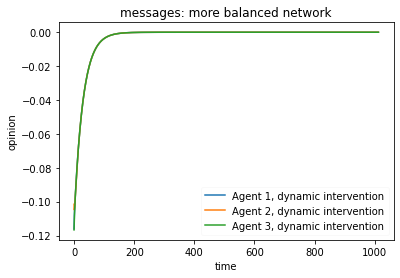

In [28]:
for i in range(3):
    plt.plot(range(len(r_sequence_2i)), [r_sequence_2i[j][i].item() for j in range(len(r_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

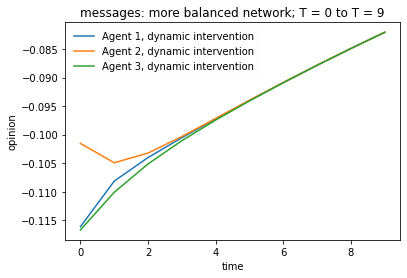

In [29]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

## Correctness-check of $K_{ss}$:

In [30]:
K_ss_1

array([[7.68691887, 0.        , 0.        ],
       [0.        , 2.8178777 , 0.        ],
       [0.        , 0.        , 1.05830653]])

In [31]:
K_ss_2

array([[7.68691887, 0.        , 0.        ],
       [0.        , 1.03495506, 0.        ],
       [0.        , 0.        , 1.17295166]])

In [32]:
def K_j_star(c, delta, lambda_j):
    return ((delta + delta*c*lambda_j**2 - c + np.sqrt((c - delta - delta*c*lambda_j**2)**2 + 4 * delta * c))) / (2 * delta)

In [33]:
np.diag([K_j_star(c, delta, lambda_j) for lambda_j in eigvals_1])

array([[7.68691887, 0.        , 0.        ],
       [0.        , 2.8178777 , 0.        ],
       [0.        , 0.        , 1.05830653]])

In [34]:
np.diag([K_j_star(c, delta, lambda_j) for lambda_j in eigvals_2])

array([[7.68691887, 0.        , 0.        ],
       [0.        , 1.03495506, 0.        ],
       [0.        , 0.        , 1.17295166]])

The analytical result is the same as the numerical result.

In [35]:
-x_0.T @ K_ss_1 @ x_0

array([[-865.5964927]])

In [36]:
-x_0.T @ K_ss_2 @ x_0

array([[-823.88955516]])

## Correctness-check of $L_{ss}$:

In [37]:
L_ss_1 = -delta * (np.linalg.inv((delta * K_ss_1) + (c * np.identity(3))) @ K_ss_1 @ np.diag(eigvals_1))
L_ss_2 = -delta * (np.linalg.inv((delta * K_ss_2) + (c * np.identity(3))) @ K_ss_2 @ np.diag(eigvals_2))

In [38]:
L_ss_1

array([[-0.03343459, -0.        , -0.        ],
       [-0.        , -0.01066838, -0.        ],
       [-0.        , -0.        , -0.0011755 ]])

In [39]:
L_ss_2

array([[-0.03343459, -0.        , -0.        ],
       [-0.        , -0.00090012, -0.        ],
       [-0.        , -0.        , -0.00213084]])

In [40]:
def L_ss_j(c, delta, lambda_j):
    return -(delta * K_j_star(c, delta, lambda_j) * lambda_j) / (delta * K_j_star(c, delta, lambda_j) + c)

In [41]:
np.diag([L_ss_j(c, delta, lambda_j) for lambda_j in eigvals_1])

array([[-0.03343459,  0.        ,  0.        ],
       [ 0.        , -0.01066838,  0.        ],
       [ 0.        ,  0.        , -0.0011755 ]])

In [42]:
np.diag([L_ss_j(c, delta, lambda_j) for lambda_j in eigvals_2])

array([[-0.03343459,  0.        ,  0.        ],
       [ 0.        , -0.00090012,  0.        ],
       [ 0.        ,  0.        , -0.00213084]])

Again, the analytical result is the same as the numerical result.

# Comparison between infinite-horizon dynamic targeting and one-shot targeting

In [43]:
# finite/infinite horizon behaves the same in intermediate periods,
#   so pinning T to that of the infinite horizon model
def one_shot(A, delta, c, T, x_0):
    xs = [x_0]
    I = np.identity(len(x_0))
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    tilde_x_0 = U.T @ x_0
    tilde_r_0 = -delta * np.linalg.inv((c * I) + (delta * np.linalg.inv(I - (delta * (D @ D))))) @ np.linalg.inv(I - (delta * (D @ D))) @ D @ tilde_x_0
    tilde_x_t = D @ tilde_x_0 + tilde_r_0
    xs.append(U @ tilde_x_t)
    r_0 = U @ tilde_r_0
    print("r_0 =", r_0.T)
    for i in range(T-1):
        tilde_x_t = D @ tilde_x_t
        xs.append(U @ tilde_x_t)
       
    payoff = 0.0
    stage_payoffs = []
    discounted_stage_payoffs = []
    cumulative_payoffs = []
    
    payoff += -(x_0.T @ x_0).item() - (c * (r_0.T @ r_0).item())
    stage_payoffs.append(payoff)
    discounted_stage_payoffs.append(payoff)
    cumulative_payoffs.append(payoff)
    for i in range(1, T+1):
        stage_payoff = (xs[i].T @ xs[i]).item()
        stage_payoffs.append(-stage_payoff)
        discounted_stage_payoffs.append(-delta**i * stage_payoff)
        payoff += -delta**i * stage_payoff
        cumulative_payoffs.append(payoff)
    return xs, payoff, stage_payoffs, discounted_stage_payoffs, cumulative_payoffs

In [44]:
one_xs_1, one_payoff_1, one_stage_payoffs_1, one_discounted_stage_payoffs_1, one_cumulative_payoffs_1 = one_shot(A_1, delta, c, len(x_sequence_1i) - 1, x_0)

r_0 = [[-0.21287995 -0.10605673 -0.11168533]]


In [45]:
one_xs_2, one_payoff_2, one_stage_payoffs_2, one_discounted_stage_payoffs_2, one_cumulative_payoffs_2 = one_shot(A_2, delta, c, len(x_sequence_2i) - 1, x_0)

r_0 = [[-0.14821591 -0.13362046 -0.14878564]]


Compare this to the first messages in the dynamic model:

In [46]:
r_sequence_1i[:3]

[array([[-0.1792189 ],
        [-0.07467276],
        [-0.08045428]]),
 array([[-0.16449244],
        [-0.08061934],
        [-0.07805544]]),
 array([[-0.15182188],
        [-0.08226546],
        [-0.07827491]])]

In [47]:
r_sequence_2i[:3]

[array([[-0.11612485],
        [-0.10153316],
        [-0.11668793]]),
 array([[-0.10814359],
        [-0.10492636],
        [-0.11009727]]),
 array([[-0.10400734],
        [-0.10322523],
        [-0.10512969]])]

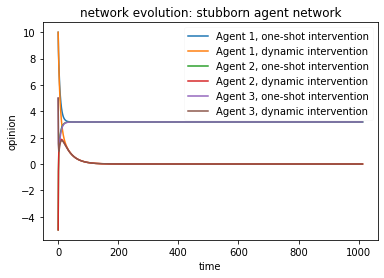

In [48]:
for i in range(3):
    plt.plot(range(len(one_xs_1)), [one_xs_1[j][i].item() for j in range(len(one_xs_1))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_1i)), [x_sequence_1i[j][i].item() for j in range(len(x_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

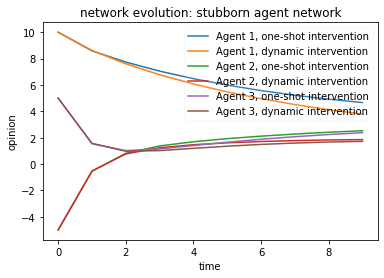

In [49]:
for i in range(3):
    plt.plot(range(10), [one_xs_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

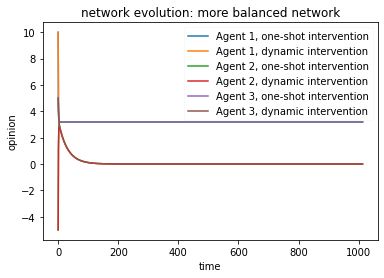

In [50]:
for i in range(3):
    plt.plot(range(len(one_xs_2)), [one_xs_2[j][i].item() for j in range(len(one_xs_2))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_2i)), [x_sequence_2i[j][i].item() for j in range(len(x_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

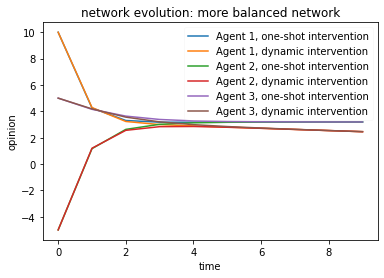

In [51]:
for i in range(3):
    plt.plot(range(10), [one_xs_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

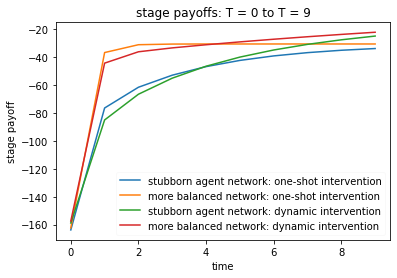

In [52]:
TRUNCATE_TO = 10
plt.plot(range(TRUNCATE_TO), one_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), one_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

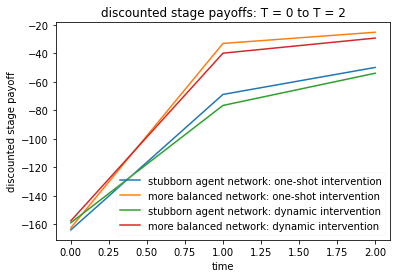

In [53]:
TRUNCATE_TO = 3
plt.plot(range(TRUNCATE_TO), one_discounted_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), one_discounted_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

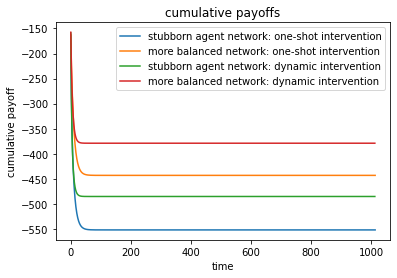

In [54]:
plt.plot(range(len(one_cumulative_payoffs_1)), one_cumulative_payoffs_1, label = "stubborn agent network: one-shot intervention")
plt.plot(range(len(one_cumulative_payoffs_2)), one_cumulative_payoffs_2, label = "more balanced network: one-shot intervention")
plt.plot(range(len(cumulative_payoffs_1i)), cumulative_payoffs_1i, label = "stubborn agent network: dynamic intervention")
plt.plot(range(len(cumulative_payoffs_2i)), cumulative_payoffs_2i, label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()